<a href="https://colab.research.google.com/github/PPatrickGU/ROB311/blob/master/TP6_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ROB311 TP6** 

### **Implementation of the algorithm of K-means to identify the handwriting number** 

*Author: Yan CHEN & Dajing GU*

In [ ]:
import pandas as pd
import numpy as np
import itertools
import operator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import  rgb2hex
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

### **Useful function**

In [ ]:
def data_loading(path):
    dataset = pd.read_csv(path,header=None)
    data = dataset.iloc[:, 0:-1]
    label = dataset.iloc[:, -1]
    return data, label

def plot_result(data, data_label_pred, centers, title):
  plt.figure(figsize=(12, 8))
  colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'] 
  for i, color in enumerate(colors): #cluster
    need_idx = np.where(data_label_pred==i)[0]
    plt.scatter(data[need_idx,1],data[need_idx,0], c=color, label= 'cluster ' + str(i) )
  for i in range(10): #centroid
    plt.scatter(centers[i,1], centers[i,0], c='k', marker = '+', s = 200)  
  plt.legend(loc='upper right')
  plt.title(title)
  plt.show()

def getAccuracy(testSet, predictions):
  correct = 0
  for x in range(testSet.shape[0]):
    if testSet[x] == predictions[x]:
      correct += 1
  print("\n Accuracy: %.2f%% \n" %float(correct/len(predictions)*100))


# Reference : https://blog.csdn.net/u012193416/article/details/79469770
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
        print("Normalized confusion matrix")
    else:
        title = 'Confusion matrix without normalization'
        print('Confusion matrix without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment='top',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

def getResult(prediction_label, true_label):
    cm = confusion_matrix(true_label, prediction_label)
    #print("classification report : ", "\n", classification_report(true_label, prediction_label))
    print("\n", "confusion matrix:", "\n", cm, "\n")
    getAccuracy(prediction_label, true_label)
    label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    plot_confusion_matrix(cm, classes=label_names, normalize=True)

# Reference: https://stackoverflow.com/questions/45114760/how-to-plot-the-confusion-similarity-matrix-of-a-k-mean-algorithm
def getLabelMatched(label, label_pred):
  k_labels = label_pred  # Get cluster labels
  k_labels_matched = np.empty_like(train_label)
  
  # For each cluster label...
  for k in np.unique(k_labels):
    # ...find and assign the best-matching real label
    match_nums = [np.sum((k_labels==k)&(label==t)) for t in np.unique(label)]
    k_labels_matched[k_labels==k] = np.unique(label)[np.argmax(match_nums)]
  return k_labels_matched

def bench_k_means(name, data, labels, labels_pred):

  print(82 * '_')
  print('init\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

  print('%-9s\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name,
             metrics.homogeneity_score(labels, labels_pred),
             metrics.completeness_score(labels, labels_pred),
             metrics.v_measure_score(labels, labels_pred),
             metrics.adjusted_rand_score(labels, labels_pred),
             metrics.adjusted_mutual_info_score(labels,  labels_pred),
             metrics.silhouette_score(data, labels_pred,
                                      metric='euclidean',
                                      sample_size=len(labels))))
  print(82 * '_')

### **Data loading**

In [ ]:
train_path = "./optdigits.tra"
test_path = "./optdigits.tes"
train_data, train_label = data_loading(train_path)
test_data, test_label = data_loading(test_path)

### **I）Classification with the training data**


Methode of initialization : k-means++(Default)



__________________________________________________________________________________
init		homo	compl	v-meas	ARI	AMI	silhouette
K-means++	0.759	0.773	0.765	0.680	0.764	0.191
__________________________________________________________________________________

 confusion matrix: 
 [[373   1   0   0   1   0   1   0   0   0]
 [  0 363  15   9   0   1   1   0   0   0]
 [  0   0 329  19   0   0   1   4  27   0]
 [  0   8   5 343   0   4   0  10  19   0]
 [  0  35   0   0 307   7   4  29   5   0]
 [  0   7   0  70   0 297   2   0   0   0]
 [  0   3   0   0   1   0 373   0   0   0]
 [  0  11   0   0   0   0   0 373   3   0]
 [  0  36   0   8   0   3   4   1 328   0]
 [  0  99   0 256   0   1   0  24   2   0]] 


 Accuracy: 80.72% 

Normalized confusion matrix


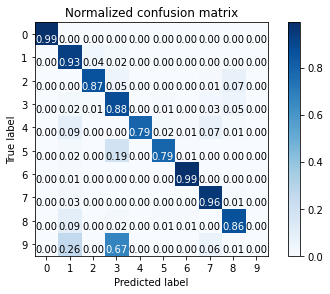

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=10, random_state=0, n_init=10).fit(train_data) 
train_label_pred = kmeans.labels_
centers = kmeans.cluster_centers_
bench_k_means("K-means++" ,train_data,train_label, train_label_pred)

train_label_matched = getLabelMatched(train_label, train_label_pred)
getResult(train_label_matched, train_label)


Methode of initialization : random

__________________________________________________________________________________
init		homo	compl	v-meas	ARI	AMI	silhouette
Random   	0.757	0.772	0.765	0.677	0.764	0.191
__________________________________________________________________________________

 confusion matrix: 
 [[373   1   0   0   1   0   1   0   0   0]
 [  0 362  15   9   0   1   1   1   0   0]
 [  0   0 329  19   0   0   1   5  26   0]
 [  0   9   5 345   0   4   0   9  17   0]
 [  0  35   0   0 307   7   4  29   5   0]
 [  0   7   0  79   0 288   2   0   0   0]
 [  0   3   0   0   1   0 373   0   0   0]
 [  0  11   0   0   0   0   0 373   3   0]
 [  0  34   0   8   0   2   4   1 331   0]
 [  0 101   0 255   0   1   0  23   2   0]] 


 Accuracy: 80.59% 

Normalized confusion matrix


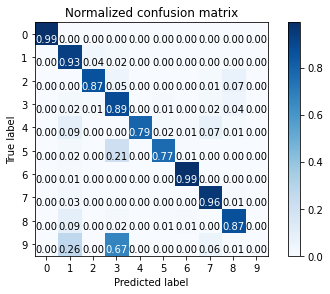

In [ ]:
kmeans = KMeans(init='random', n_clusters=10, random_state=0, n_init=10).fit(train_data) 
train_label_pred = kmeans.labels_
centers = kmeans.cluster_centers_
bench_k_means("Random", train_data, train_label, train_label_pred)
train_label_matched = getLabelMatched(train_label, train_label_pred)
getResult(train_label_matched, train_label)

Times of execute k-means : 20. Default : 10

__________________________________________________________________________________
init		homo	compl	v-meas	ARI	AMI	silhouette
Random   	0.758	0.772	0.765	0.680	0.764	0.192
__________________________________________________________________________________

 confusion matrix: 
 [[373   1   0   0   1   0   1   0   0   0]
 [  0 363  15   9   0   1   1   0   0   0]
 [  0   0 329  19   0   0   1   4  27   0]
 [  0   8   5 343   0   4   0  10  19   0]
 [  0  36   0   0 306   7   4  29   5   0]
 [  0   7   0  70   0 297   2   0   0   0]
 [  0   3   0   0   1   0 373   0   0   0]
 [  0  11   0   0   0   0   0 373   3   0]
 [  0  37   0   7   0   3   4   1 328   0]
 [  0  99   0 256   0   1   0  24   2   0]] 


 Accuracy: 80.70% 

Normalized confusion matrix


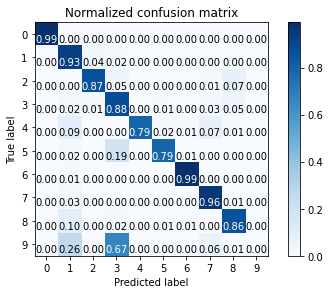

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=10, random_state=0, n_init=20, max_iter = 500, tol = 0.000001).fit(train_data) 
train_label_pred = kmeans.labels_
centers = kmeans.cluster_centers_
bench_k_means("Random", train_data, train_label, train_label_pred)
train_label_matched = getLabelMatched(train_label, train_label_pred)
getResult(train_label_matched, train_label)

PCA + k-means. Methode of initialization is k-means++(default)

__________________________________________________________________________________
init		homo	compl	v-meas	ARI	AMI	silhouette
PCA-based	0.718	0.723	0.720	0.644	0.719	0.168
__________________________________________________________________________________

 confusion matrix: 
 [[372   0   0   0   2   0   0   0   0   2]
 [  0   0 128   0   2   6   3   2 225  23]
 [  0   0 368   0   0   1   0   8   2   1]
 [  0   0   8 354   0   6   0   0   8  13]
 [  0   0   3   0 296   2   1  57   3  25]
 [  0   0  35   4   0 271   1   0   0  65]
 [  1   0   7   0   2   0 362   0   3   2]
 [  0   0  17   4   1   0   0 362   3   0]
 [  2   0  97   7   2   0  15   5 240  12]
 [  1   0  14   5   0   5   0  12  17 328]] 


 Accuracy: 77.24% 

Normalized confusion matrix


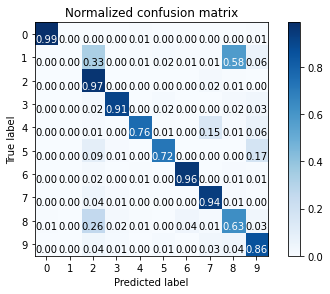

In [ ]:
pca = PCA(n_components=10, svd_solver='auto', whiten = True)
pca.fit(train_data)
train_data_PCA = pca.transform(train_data)

kmeans = KMeans(n_clusters=10, random_state=0, n_init=10).fit(train_data_PCA)
train_label_pred = kmeans.labels_
centers = kmeans.cluster_centers_

bench_k_means("PCA-based", train_data, train_label, train_label_pred)

train_label_matched = getLabelMatched(train_label, train_label_pred)
getResult(train_label_matched, train_label)

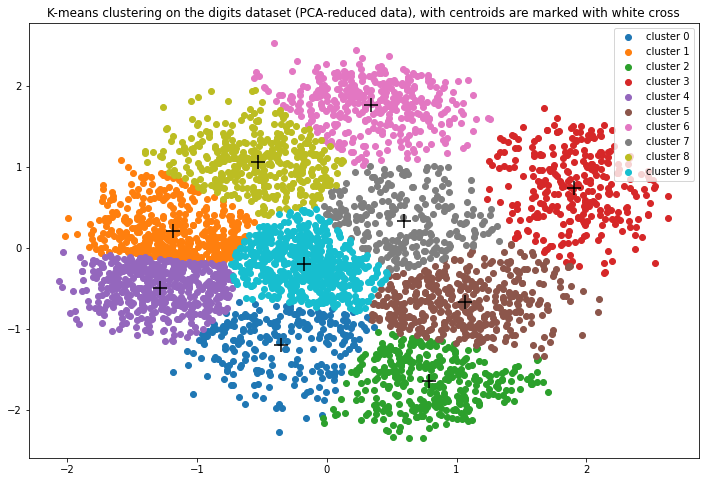

In [ ]:
pca = PCA(n_components=2, svd_solver='auto', whiten = True)
pca.fit(train_data)
train_data_PCA = pca.transform(train_data)
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10).fit(train_data_PCA)
train_label_pred = kmeans.labels_
centers = kmeans.cluster_centers_
plot_result(train_data_PCA, train_label_pred, centers, 'K-means clustering on the digits dataset (PCA-reduced data), with centroids are marked with white cross')

**Code of the demo**

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.70s	2488383	0.751	0.757	0.754	0.683	0.753	0.184
random   	0.51s	2478808	0.758	0.773	0.765	0.677	0.764	0.191
PCA-based	0.06s	2625545	0.745	0.762	0.753	0.665	0.752	0.158
__________________________________________________________________________________


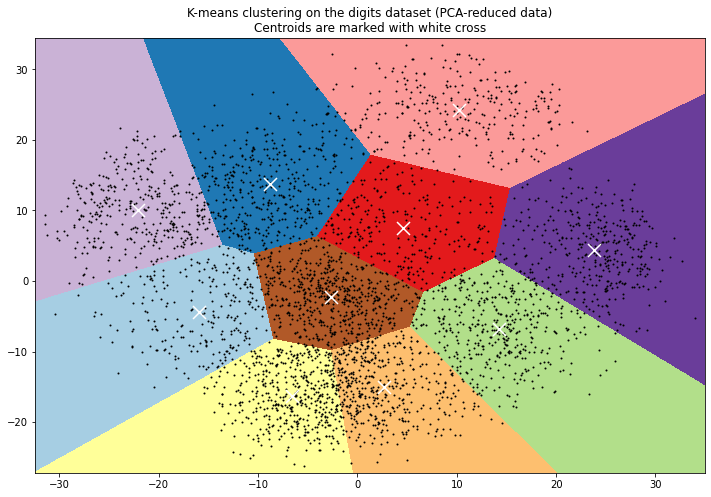

In [ ]:
# #Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html?highlight=rand_score


# from time import time
# from sklearn import metrics

# def bench_k_means(estimator, name, data):
#     t0 = time()
#     estimator.fit(data)
#     print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
#           % (name, (time() - t0), estimator.inertia_,
#              metrics.homogeneity_score(labels, estimator.labels_),
#              metrics.completeness_score(labels, estimator.labels_),
#              metrics.v_measure_score(labels, estimator.labels_),
#              metrics.adjusted_rand_score(labels, estimator.labels_),
#              metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
#              metrics.silhouette_score(data, estimator.labels_,
#                                       metric='euclidean',
#                                       sample_size=sample_size)))

# n_digits = 10
# labels = train_label
# data = train_data
# sample_size = len(train_label)


# print(82 * '_')
# print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
# bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
#               name="k-means++", data=data)

# bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
#               name="random", data=data)

# # in this case the seeding of the centers is deterministic, hence we run the
# # kmeans algorithm only once with n_init=1
# pca = PCA(n_components=n_digits).fit(data)
# bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
#               name="PCA-based",
#               data=data)
# print(82 * '_')

# # #############################################################################
# # Visualize the results on PCA-reduced data

# reduced_data = PCA(n_components=2).fit_transform(data)
# kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
# kmeans.fit(reduced_data)

# # Step size of the mesh. Decrease to increase the quality of the VQ.
# h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
# y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)

# plt.figure(figsize=(12, 8))
# plt.figure(1)
# plt.clf()
# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
# plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# # plt.xticks(())
# # plt.yticks(())
# plt.show()